In [1]:
# 数据读入
import pandas as pd
data = pd.read_csv("boston.csv")
print(data.shape)

(506, 14)


In [2]:
# 定义特征值和目标值
features = data[['crim', 'rm', 'lstat']]
target = data['medv']
print(features.shape, target.shape)

(506, 3) (506,)


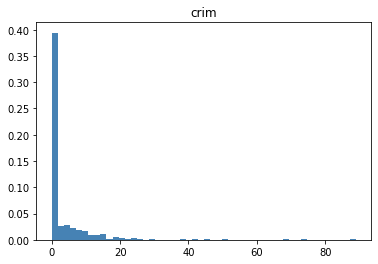

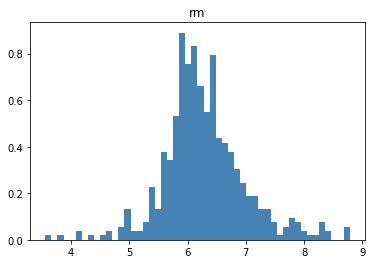

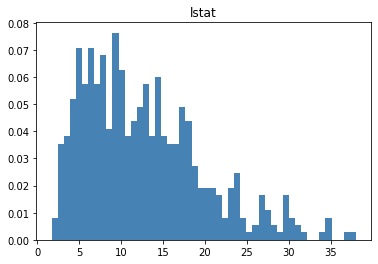

In [3]:
# 输出特征值描述性统计
import matplotlib.pyplot as plt
%matplotlib inline
for ii in features.columns:
    plt.figure()
    plt.title(ii)
    plt.hist(features[ii], bins=50, color='steelblue', density=True)
    plt.show()

In [4]:
# 区分训练集和测试集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=10)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(354, 3) (152, 3) (354,) (152,)


In [5]:
# 线性回归
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.coef_, lr.intercept_)

[-0.13071485  4.80449506 -0.60326932] 0.2010057571981534


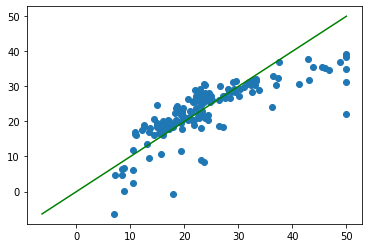

In [6]:
# 预测
y_pred = lr.predict(x_test)
import matplotlib.pyplot as plt
import numpy as np
x_min = min(np.min(y_test), np.min(y_pred))
x_max = max(np.max(y_test), np.max(y_pred))
plt.scatter(y_test, y_pred)
plt.plot([x_min, x_max], [x_min, x_max], c='g')
plt.show()

In [7]:
# 获取平均绝对误差MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae_test = mean_absolute_error(y_test, y_pred)

# 获取均分误差MSE
mse_test = mean_squared_error(y_test, y_pred)
print("MSE:{}\nMAE:{}".format(mse_test, mae_test))

MSE:36.141455467161414
MAE:4.257346287737668
